In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import io

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import ttest_ind
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway

In [ ]:
uploaded = files.upload()

Saving dataset_Facebook - dataset_Facebook.csv.csv to dataset_Facebook - dataset_Facebook.csv (2).csv


In [ ]:
data = pd.read_csv(io.BytesIO(uploaded['dataset_Facebook - dataset_Facebook.csv.csv']))
data.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumption,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [ ]:
# Extract columns
type_photo = data[data['Type'] == 'Photo']['Lifetime Post Total Reach']
type_status = data[data['Type'] == 'Status']['Lifetime Post Total Reach']
type_video = data[data['Type'] == 'Video']['Lifetime Post Total Reach']
type_link = data[data['Type'] == 'Link']['Lifetime Post Total Reach']

In [ ]:
# Perform ANOVA
f_stat, p_value_anova = f_oneway(type_photo, type_status, type_video, type_link)
f_stat, p_value_anova
print(f"ANOVA: f_stat={f_stat:.2f}, p_value={p_value_anova:.2f}")

ANOVA: f_stat=7.01, p_value=0.00


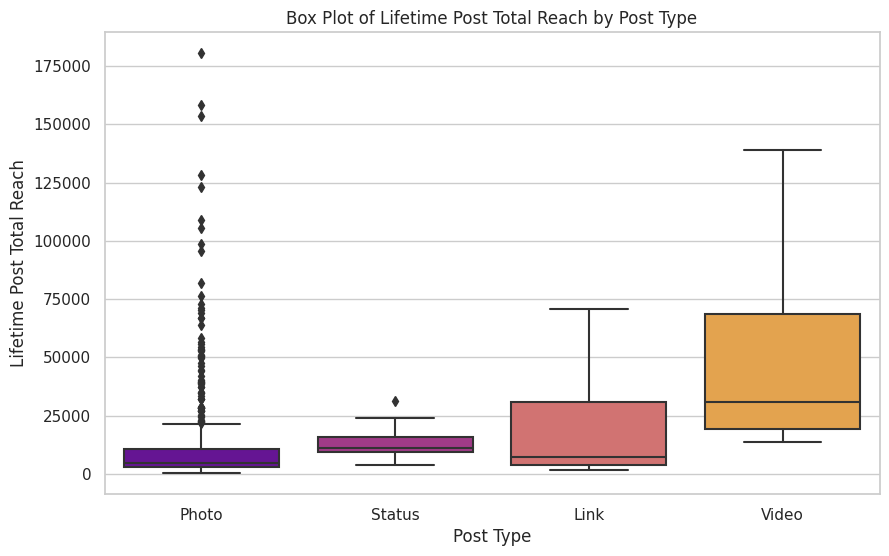

In [ ]:
# Set style
sns.set(style="whitegrid")

# Create box plots for points_per_game grouped by player_position
plt.figure(figsize=(10,6))
sns.boxplot(x='Type', y='Lifetime Post Total Reach', data=data, palette='plasma')
plt.title('Box Plot of Lifetime Post Total Reach by Post Type')
plt.xlabel('Post Type')
plt.ylabel('Lifetime Post Total Reach')
plt.show()

In [ ]:
# Prepare the data for Tukey's HSD test and Bonferroni correction
data_concat = pd.concat([type_photo, type_status, type_video, type_link])
labels = ['Photo'] * len(type_photo) + ['Status'] * len(type_status) + ['Video'] * len(type_video) + ['Link'] * len(type_link)

# Perform Tukey's HSD Test
print("\nTukey's HSD Test:")
tukey = pairwise_tukeyhsd(endog=data_concat, groups=labels, alpha=0.05)
print(tukey)

# Perform pairwise t-tests with Bonferroni correction
print("\nPairwise t-tests with Bonferroni Correction:")
comparisons = [('Video', 'Link'), ('Video', 'Photo'), ('Video', 'Status')]
bonferroni_alpha = 0.05 / len(comparisons)
for group1, group2 in comparisons:
    stat, p = ttest_ind(data[data['Type'] == group1]['Lifetime Post Total Reach'],
                        data[data['Type'] == group2]['Lifetime Post Total Reach'])
    print(f"{group1} vs {group2}: t={stat:.2f}, p={p:.2f}, p<{bonferroni_alpha} -> {'Significant' if p < bonferroni_alpha else 'Not Significant'}")


Tukey's HSD Test:
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj     lower      upper    reject
-------------------------------------------------------------
  Link  Photo -5406.7764 0.6854 -17997.9181  7184.3654  False
  Link Status  -5465.702 0.7831 -20447.4349  9516.0309  False
  Link  Video 32661.1234 0.0045   7670.2817 57651.9651   True
 Photo Status   -58.9257    1.0  -9085.8883  8968.0369  False
 Photo  Video 38067.8997 0.0001   16123.062 60012.7375   True
Status  Video 38126.8254 0.0002  14728.2918  61525.359   True
-------------------------------------------------------------

Pairwise t-tests with Bonferroni Correction:
Video vs Link: t=2.53, p=0.02, p<0.016666666666666666 -> Not Significant
Video vs Photo: t=4.26, p=0.00, p<0.016666666666666666 -> Significant
Video vs Status: t=5.33, p=0.00, p<0.016666666666666666 -> Significant


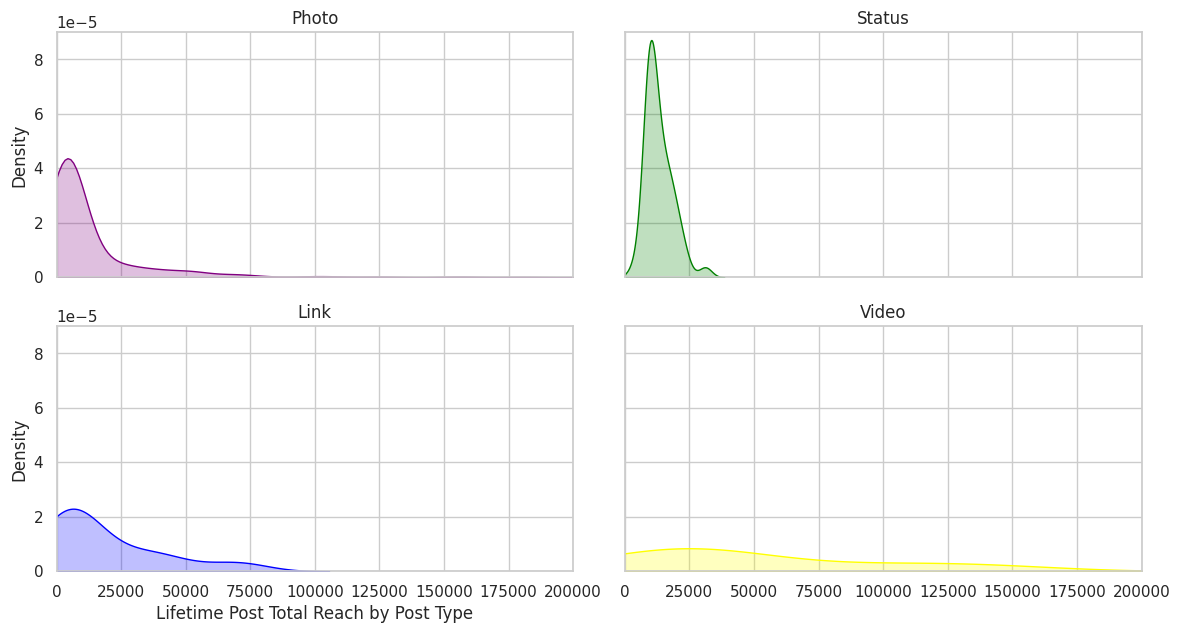

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 7), sharex=True, sharey=True)

# photo
plt.subplot(2, 2, 1)
sns.kdeplot(type_photo, fill=True, color='purple')
plt.xlim(0, 200000)
plt.ylim(0, 0.00009)

plt.title("Photo")

# status
plt.subplot(2, 2, 2)
sns.kdeplot(type_status, fill=True, color='green')
plt.xlim(0, 200000)
plt.ylim(0, 0.00009)

plt.ylabel(" ")
plt.title("Status")

# Link
plt.subplot(2, 2, 3)
sns.kdeplot(type_link, fill=True, color='blue')
plt.xlim(0, 200000)
plt.ylim(0, 0.00009)

plt.xlabel("Lifetime Post Total Reach by Post Type")
plt.title("Link")

# Video
plt.subplot(2, 2, 4)
sns.kdeplot(type_video, fill=True, color='yellow')
plt.xlim(0, 200000)
plt.ylim(0, 0.00009)

plt.ylabel(" ")
plt.xlabel(" ")
plt.title("Video")

# Show the plot
plt.subplots_adjust(hspace=.2)
plt.subplots_adjust(wspace=.1)
plt.show()

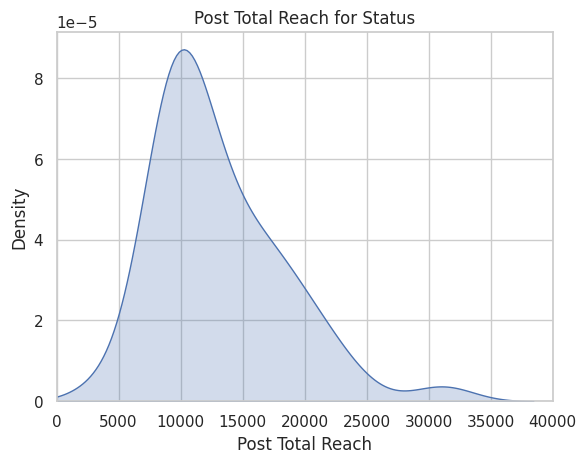

In [ ]:
sns.kdeplot(type_status, fill=True)
plt.xlim(0, 40000)

# Add labels and title
plt.xlabel("Post Total Reach")
plt.ylabel("Density")
plt.title("Post Total Reach for Status")


# Show the plot
plt.show()